In [182]:
import os
import glob
import pandas as pd
import numpy as np

class Ejector():
    def __init__(self, route_to_infractions='assetsfull/'):
        self.PATH = route_to_infractions
        self.column_names = ['hora', 'semaforo','direccion','cuantos','estado', 'placa','prob']
        self.column_names_eight = ['hora', 'semaforo','direccion','cuantos','estado', 'NONE','placa','prob']
        print('PATH IS', self.PATH)
        

    def _getDirectory(self):
        directory_list = list()
        for root, dirs, files in os.walk(self.PATH, topdown=False):
            for name in dirs:
                directory_list.append(os.path.join(root, name))
                
        return directory_list
    def _combineLists(self, listToProcess, norm):
        list_data_frames = list()
        list_data_frames_eight = list()
        counter = 0
        for infraction in listToProcess:
            try:
                df = pd.DataFrame.from_dict(infraction, orient='index')
                if norm is True:
                    df.columns = self.column_names 
                else:
                    pass
                list_data_frames.append(df)
            except Exception as e:
                for k, v in infraction.items():
                    if len(v) > 7:
                        #print('infraction  8 level is', infraction)
                        df_eigth = pd.DataFrame.from_dict(infraction, orient='index')
                        df_eigth.columns = self.column_names_eight
                        list_data_frames_eight.append(df_eigth)
                    else:
                        pass

                #print('this has not hve the format..')
                #print(e)
                #print(infraction)
                
        return list_data_frames, list_data_frames_eight

    def _getPandasdf(self, directory_list, norm):
        CAP_ROJOS = list()
        rojos = list()
        amarillos = list()
        verde = list()
                
        # Iterate over all the folders
        for i, folder in enumerate(directory_list):
            # Place Holder for the information to be appendend in lists
            infraction = {}
            
            # Split this folders by / 
            splited = folder.split('/') # for the i element in the list, create a auxi split list  
            information, date = splited[-1], splited[-2] # get the last two element of this list
            
            # split the information array with _     
            granular_information = information.split('_')
            #granular_information.append(date.split('_')[0])
            # append the information to his respective list 
            if ('ROJO' in granular_information):
                #infraction['information'] = granular_information
                infraction[date.split('_')[0]] = granular_information
                CAP_ROJOS.append(infraction)
            elif ('rojo' in granular_information) or ('Rojo' in granular_information):
                #infraction['information'] = granular_information
                infraction[date.split('_')[0]] = granular_information
                rojos.append(infraction)
            elif ('amarillo' in granular_information) or ('Amarillo' in granular_information):
                #infraction['information'] = granular_information
                infraction[date.split('_')[0]] = granular_information
                amarillos.append(infraction)
            elif ('verde' in granular_information) or ('VERDE' in granular_information) or ("Verde" in granular_information):
                infraction[date.split('_')[0]] = granular_information
                verde.append(infraction)
            else:
                pass#print('This not have lavel')
            
        # Convine all the lists
        ROJOS_list, ROJOS_list_eigth = self._combineLists(CAP_ROJOS,norm)
        rojos_list, rojos_list_eigth = self._combineLists(rojos,norm)
        amarillos_list, amarillos_list_eigth = self._combineLists(amarillos,norm)
        verde_list, verde_list_eigth = self._combineLists(verde,norm)
        
        # Concat lists
        ROJOS_CAP = pd.concat(ROJOS_list)
        rojos = pd.concat(rojos_list)
        amarillos = pd.concat(amarillos_list)
        verde = pd.concat(verde_list)
        
        ROJOS_CAP_eigth = pd.concat(ROJOS_list_eigth)
        rojos_eigth = pd.concat(rojos_list_eigth)
        amarillos_eigth = pd.concat(amarillos_list_eigth)
        verde_eigth = pd.concat(verde_list_eigth)
        
        # Reset indexes
        ROJOS_CAP = ROJOS_CAP.reset_index()
        rojos = rojos.reset_index()
        amarillos = amarillos.reset_index()
        verde = verde.reset_index()
        
        ROJOS_CAP_eigth = ROJOS_CAP_eigth.reset_index()
        rojos_eigth = rojos_eigth.reset_index()
        amarillos_eigth = amarillos_eigth.reset_index()
        verde_eigth = verde_eigth.reset_index()
        
        EIGHT_df = [ROJOS_CAP_eigth, rojos_eigth, amarillos_eigth, verde_eigth]
        
        return ROJOS_CAP, rojos, amarillos, verde, EIGHT_df
    
    def __call__(self, norm=True):
        directory_list = self._getDirectory()
        return self._getPandasdf(directory_list, norm)
    
theEjector = Ejector()   
R,r,y,g, EIGTH_df = theEjector()

PATH IS assetsfull/


In [183]:
print(R.shape)
print(r.shape)
print(y.shape)
print(g.shape)
# R['prob'] = R['prob'].astype(int)
#R[R['prob'] == 100]
df_seven = pd.concat([R,y,r,g])
print(df.shape)

# /////////////////////////////////////////////////
# /////////////////////////////////////////////////
print('EIGHT DF')
print(EIGTH_df[0].shape)
print(EIGTH_df[1].shape)
print(EIGTH_df[2].shape)
print(EIGTH_df[3].shape)

df_eigth = pd.concat(EIGTH_df)
print(df_eigth.shape)

(599, 8)
(506, 8)
(195, 8)
(4, 8)
(2092, 9)
EIGHT DF
(396, 9)
(386, 9)
(4, 9)
(2, 9)
(788, 9)


In [184]:
df_seven.head()

,index,hora,semaforo,direccion,cuantos,estado,placa,prob
0,2018-02-07,14-23-23,ROJO,directo,x1,-Infraccion,4481CKL,100
1,2018-02-07,11-11-15,ROJO,directo,x1,-Infraccion,2198PYT,100
2,2018-02-07,11-38-41,ROJO,directo,x1,-Infraccion,2915GHF,100
3,2018-02-07,09-38-48,ROJO,directo,x1,-Infraccion-PlacaNoVisible,638USR,100
4,2018-02-07,15-20-38,ROJO,directo,x1,-Infraccion,2856IRI,100


In [185]:
df_eigth.head()

,index,hora,semaforo,direccion,cuantos,estado,NONE,placa,prob
0,2018-02-12,14-42-25,ROJO,izquierda,x1,-Infraccion,,4564LKF,100
1,2018-02-12,08-33-24,ROJO,directo,x1,-Infraccion,,2273PLB,100
2,2018-02-12,11-56-54,ROJO,directo,x1,-Infraccion-Duplicado,,1226XCS,100
3,2018-02-12,07-27-38,ROJO,directo,x1,-Infraccion,,4028BAD,100
4,2018-02-12,08-37-47,ROJO,directo,x1,-Infraccion,,4263PDN,100


In [186]:
# Drop None COlumn
df_eigth = df_eigth.drop(['NONE'], axis=1)
df_eigth.head()

,index,hora,semaforo,direccion,cuantos,estado,placa,prob
0,2018-02-12,14-42-25,ROJO,izquierda,x1,-Infraccion,4564LKF,100
1,2018-02-12,08-33-24,ROJO,directo,x1,-Infraccion,2273PLB,100
2,2018-02-12,11-56-54,ROJO,directo,x1,-Infraccion-Duplicado,1226XCS,100
3,2018-02-12,07-27-38,ROJO,directo,x1,-Infraccion,4028BAD,100
4,2018-02-12,08-37-47,ROJO,directo,x1,-Infraccion,4263PDN,100


In [187]:
# MERge all the datasets df and df_eight  into one
df = pd.concat([df_seven, df_eigth])
print(df.shape)
df.head()

(2092, 8)


,index,hora,semaforo,direccion,cuantos,estado,placa,prob
0,2018-02-07,14-23-23,ROJO,directo,x1,-Infraccion,4481CKL,100
1,2018-02-07,11-11-15,ROJO,directo,x1,-Infraccion,2198PYT,100
2,2018-02-07,11-38-41,ROJO,directo,x1,-Infraccion,2915GHF,100
3,2018-02-07,09-38-48,ROJO,directo,x1,-Infraccion-PlacaNoVisible,638USR,100
4,2018-02-07,15-20-38,ROJO,directo,x1,-Infraccion,2856IRI,100


In [188]:
# save to disk as csv file 

df.to_csv("montecinos_data.csv", encoding='utf-8', sep=',', index=False)

# LOAD DATA SET 

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline


df = pd.read_csv('montecinos_data.csv')
df.head()

,index,hora,semaforo,direccion,cuantos,estado,placa,prob
0,2018-02-07,14-23-23,ROJO,directo,x1,-Infraccion,4481CKL,100
1,2018-02-07,11-11-15,ROJO,directo,x1,-Infraccion,2198PYT,100
2,2018-02-07,11-38-41,ROJO,directo,x1,-Infraccion,2915GHF,100
3,2018-02-07,09-38-48,ROJO,directo,x1,-Infraccion-PlacaNoVisible,638USR,100
4,2018-02-07,15-20-38,ROJO,directo,x1,-Infraccion,2856IRI,100


In [107]:
# Check unique elements in index
unique_words = sorted(np.unique(df['estado'].tolist()))
unique_days = sorted(np.unique(df['index'].tolist()))
print('Unique days are : ', unique_days)
print('How many days : ', len(unique_days))
print('....................................')
print('Unique Words : ', unique_words)
print('How many unique comments : ', len(unique_words))

Unique days are :  ['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13', '2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18', '2018-02-19', '2018-02-20', '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-24']
How many days :  23
....................................
Unique Words :  ['-', '-Adelantado', '-Altavelocidad', '-BUG', '-Bicicleta', '-CONGESTIONDespintado', '-Camara', '-DESPINTADO', '-FLOTA', '-GENTE', '-Infraccion', '-Infraccion-Adelantado', '-Infraccion-Alejado', '-Infraccion-Ambulancia', '-Infraccion-Argentina', '-Infraccion-Borroso', '-Infraccion-Camion', '-Infraccion-Camion-Duplicado', '-Infraccion-CasiAtropella', '-Infraccion-Chileno', '-Infraccion-Colectivo', '-Infraccion-Cortado', '-Infraccion-Despintado', '-Infraccion-Doble', '-Infraccion-Duplicado', '-Infraccion-GiroDerecha', '-Infraccion-Moto', '-Infraccion-Pintado', '-Infraccion-PlacaB

# Filter one week of work

In [108]:
# Group by aviable days in unique_days
df_by_days = []
for day in unique_days:
    # Filter by aviable days
    single_day = df[df['index'] == day]
    # Sort by hour
    single_day = single_day.sort_values('hora')
    # COnvert prob to integer value
    single_day['prob'] = single_day['prob'].astype(int)
    # Append to aux list
    df_by_days.append(single_day)
    
print(len(df_by_days))
df_by_days[1].head()

23


,index,hora,semaforo,direccion,cuantos,estado,placa,prob
430,2018-02-02,06-01-57,ROJO,directo,x1,-blur-noche,xxxx,0
421,2018-02-02,06-07-45,ROJO,directo,x1,-blur-noche,xxxx,0
422,2018-02-02,06-11-56,ROJO,directo,x1,-blur-noche,xxxx,0
425,2018-02-02,06-17-00,ROJO,directo,x1,-blur-noche,xxxx,0
424,2018-02-02,06-48-13,ROJO,directo,x1,-blur-noche,xxxx,0


In [109]:
# Join one Week of work
one_week = pd.concat(df_by_days[0:15])

print(one_week.shape)
one_week.head()

(1774, 8)


,index,hora,semaforo,direccion,cuantos,estado,placa,prob
315,2018-02-01,06-03-44,ROJO,directo,x1,-pocaluz-blur,xxxxx,0
313,2018-02-01,06-03-56,ROJO,directo,x1,-pocaluz-blur,xxxxx,0
720,2018-02-01,06-06-42,amarillo,directo,x1,-pocaluz-blur,xxxxx,0
724,2018-02-01,06-10-45,amarillo,directo,x1,-pocaluz-blur,xxxxx,0
327,2018-02-01,06-14-04,ROJO,directo,x1,-pocaluz-lento-blur,xxxxx,0


In [110]:
one_week = one_week[(one_week['semaforo'] == 'ROJO') & # (one_week['prob'] != 0) & \
                    (one_week['estado'] != '-pocaluz-lento-blur')&
                   (one_week['estado'] != '-lento') &
                   (one_week['estado'] != '-sinpintar') &
                   (one_week['estado'] != '-blur') &
                   (one_week['estado'] != '-ruido') &
                   (one_week['estado'] != '-bicibleta') &
                   (one_week['estado'] != '-rapido') &
                   (one_week['estado'] != '-muylento') &
                   (one_week['estado'] != '-bicicleta') &
                   (one_week['estado'] != '-muyabajo') &
                   (one_week['estado'] != '-bicileta') &
                   (one_week['estado'] != '-ruidoadelantado') &
                   (one_week['estado'] != '-ruidoadelntado') &
                   (one_week['estado'] != '-sinPlaca') &
                   (one_week['estado'] != '-sinplaca') &
                   (one_week['estado'] != '-sucio') &
                   (one_week['estado'] != '-pedestrian')
                   ]  

In [111]:
datetime_rowid = one_week['hora'].map(lambda t: pd.to_datetime(t, format='%H-%M-%S'))
one_week.index = datetime_rowid
print(one_week.shape)
one_week.head()

(787, 8)


,index,hora,semaforo,direccion,cuantos,estado,placa,prob
hora,,,,,,,,
1900-01-01 06:03:44,2018-02-01,06-03-44,ROJO,directo,x1,-pocaluz-blur,xxxxx,0
1900-01-01 06:03:56,2018-02-01,06-03-56,ROJO,directo,x1,-pocaluz-blur,xxxxx,0
1900-01-01 06:21:58,2018-02-01,06-21-58,ROJO,directo,x1,-pocaluz-blur,xxxxx,0
1900-01-01 06:25:12,2018-02-01,06-25-12,ROJO,directo,x1,-pocaluz-blur,xxxxx,0
1900-01-01 06:31:26,2018-02-01,06-31-26,ROJO,directo,x1,-pocaluz-blur,xxxxx,0


In [112]:
daily = one_week['prob'].resample('H')
daily_mean = daily.mean()

In [113]:
daily_mean

hora
1900-01-01 06:00:00    12.672000
1900-01-01 07:00:00    64.790698
1900-01-01 08:00:00    92.194444
1900-01-01 09:00:00    94.744186
1900-01-01 10:00:00    94.083333
1900-01-01 11:00:00    96.226415
1900-01-01 12:00:00    99.063830
1900-01-01 13:00:00    94.545455
1900-01-01 14:00:00    97.217391
1900-01-01 15:00:00    99.318182
1900-01-01 16:00:00    93.173913
1900-01-01 17:00:00    87.722222
1900-01-01 18:00:00    52.869565
1900-01-01 19:00:00     7.142857
1900-01-01 20:00:00     0.000000
Freq: H, Name: prob, dtype: float64

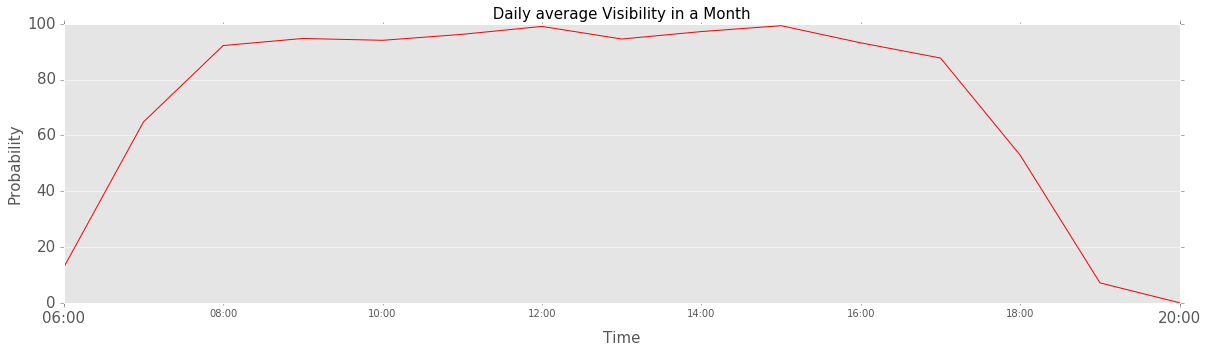

In [115]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
#one_week['prob'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')
ax.set_title(' Daily average Visibility in a Month ')
ax.set_xlabel('Time')
ax.set_ylabel('Probability')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('infractions_mean.png', format='png', dpi=500)

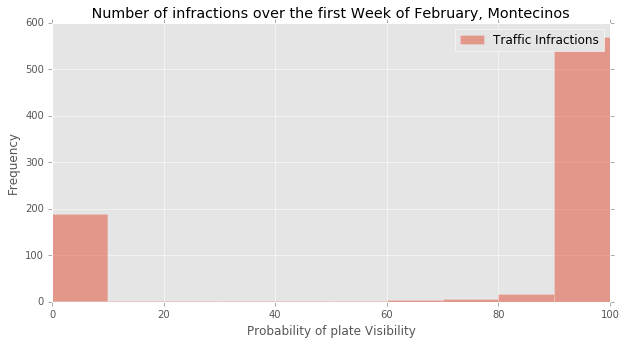

In [116]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
one_week.plot.hist(alpha=0.5, figsize=(10,5), ax = ax)
ax.set_title(' Number of infractions over the first Week of February, Montecinos ')
ax.legend(["Traffic Infractions"])
ax.set_xlabel('Probability of plate Visibility')
plt.savefig('histogram.png', format='png', dpi=500)

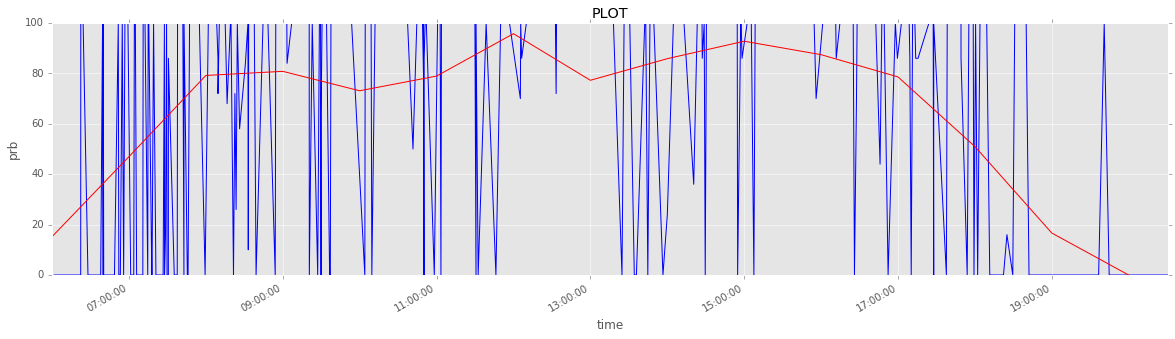

In [109]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
one_week['prob'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')
ax.set_title('PLOT')
ax.set_xlabel('time')
ax.set_ylabel('prb')
plt.savefig('infractions.png', format='png', dpi=300)

# ONe MONTH AVERAGE

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [85]:
%ls


cleandata.ipynb                  montecinos_FEBRERO_amarillo.xlsx
data-20180306T135832Z-001.zip    montecinos_FEBRERO_missing.xlsx
data.json                        montecinos_FEBRERO_ROJO.csv
getJSON.ipynb                    montecinos_FEBRERO_ROJO.xlsx
histogram.png                    Montesinos/
infractions_mean.png             README.md
Montecinos2/                     tests.ipynb
montecinos_data.csv              word_counting_montecinos.csv
montecinos_data_ROJO.csv         word_frecuency_debug_from_article.png
montecinos_FEBRERO_amarillo.csv  word_frecuency_from_article.png


In [86]:
df = pd.read_csv('montecinos_data.csv')
df.head()

,index,hora,semaforo,direccion,cuantos,estado,placa,prob
0,2018-02-07,14-23-23,ROJO,directo,x1,-Infraccion,4481CKL,100
1,2018-02-07,11-11-15,ROJO,directo,x1,-Infraccion,2198PYT,100
2,2018-02-07,11-38-41,ROJO,directo,x1,-Infraccion,2915GHF,100
3,2018-02-07,09-38-48,ROJO,directo,x1,-Infraccion-PlacaNoVisible,638USR,100
4,2018-02-07,15-20-38,ROJO,directo,x1,-Infraccion,2856IRI,100


In [87]:
# create data table with dates

In [88]:
df['prob'] = df['prob'].astype(int)
df['date'] = df['index'] + ' ' + df['hora']
print(df.shape)
df.head()

(2092, 9)


,index,hora,semaforo,direccion,cuantos,estado,placa,prob,date
0,2018-02-07,14-23-23,ROJO,directo,x1,-Infraccion,4481CKL,100,2018-02-07 14-23-23
1,2018-02-07,11-11-15,ROJO,directo,x1,-Infraccion,2198PYT,100,2018-02-07 11-11-15
2,2018-02-07,11-38-41,ROJO,directo,x1,-Infraccion,2915GHF,100,2018-02-07 11-38-41
3,2018-02-07,09-38-48,ROJO,directo,x1,-Infraccion-PlacaNoVisible,638USR,100,2018-02-07 09-38-48
4,2018-02-07,15-20-38,ROJO,directo,x1,-Infraccion,2856IRI,100,2018-02-07 15-20-38


In [89]:
datetime_rowid = df['date'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H-%M-%S'))
df.index = datetime_rowid
print(df.shape)
df.head()

(2092, 9)


,index,hora,semaforo,direccion,cuantos,estado,placa,prob,date
date,,,,,,,,,
2018-02-07 14:23:23,2018-02-07,14-23-23,ROJO,directo,x1,-Infraccion,4481CKL,100,2018-02-07 14-23-23
2018-02-07 11:11:15,2018-02-07,11-11-15,ROJO,directo,x1,-Infraccion,2198PYT,100,2018-02-07 11-11-15
2018-02-07 11:38:41,2018-02-07,11-38-41,ROJO,directo,x1,-Infraccion,2915GHF,100,2018-02-07 11-38-41
2018-02-07 09:38:48,2018-02-07,09-38-48,ROJO,directo,x1,-Infraccion-PlacaNoVisible,638USR,100,2018-02-07 09-38-48
2018-02-07 15:20:38,2018-02-07,15-20-38,ROJO,directo,x1,-Infraccion,2856IRI,100,2018-02-07 15-20-38


In [ ]:
Plot daily mean

In [101]:
daily = df['prob'].resample('H')
daily_mean = daily.mean()

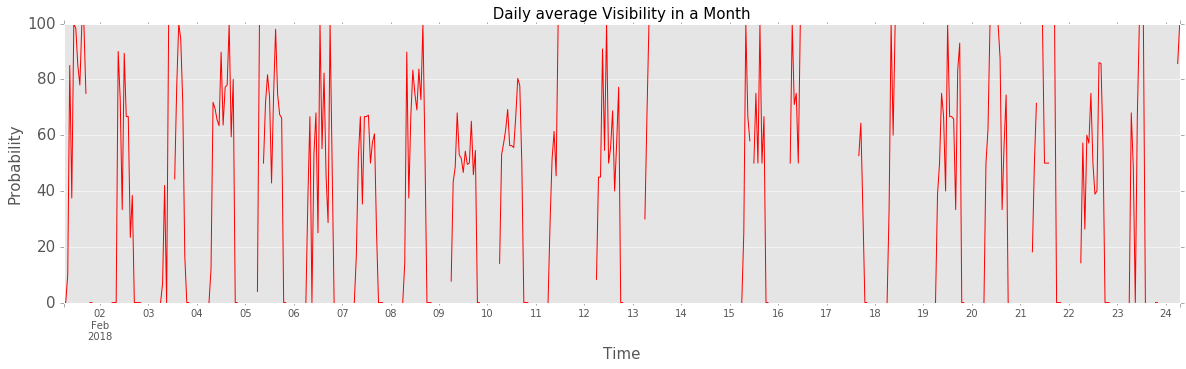

In [102]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
#one_week['prob'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')
ax.set_title(' Daily average Visibility in a Month ')
ax.set_xlabel('Time')
ax.set_ylabel('Probability')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
#plt.savefig('infractions_mean.png', format='png', dpi=500)

## Filtering camps
#### AUtos que pasaron en ROJO puro

In [195]:
df_f_R = df[(df['prob'] == 100) & ((df['semaforo'] == 'ROJO'))]
df_f_R = df_f_R.sort_values(by=['date'])
df_f_R = df_f_R.drop(['date','hora','index'], axis=1)
print(df_f_R.shape)
df_f_R.columns = ['semaforo', "direccion", "cuantos", "comentario", "placa", "prob"]
print(df_f_R.columns)

# Save to disk
#df_f.to_csv("montecinos_FEBRERO_ROJO.csv", encoding='utf-8', sep=',', index=True)
writer = pd.ExcelWriter("montecinos_FEBRERO_ROJO.xlsx")
df_f_R.to_excel(writer,'Sheet1')
writer.save()
df_f_R.head()

(720, 6)
Index(['semaforo', 'direccion', 'cuantos', 'comentario', 'placa', 'prob'], dtype='object')


,semaforo,direccion,cuantos,comentario,placa,prob
date,,,,,,
2018-02-01 09:43:15,ROJO,directo,x1,-,4529FZL,100
2018-02-01 10:49:20,ROJO,directo,x1,-rapido,226XSN,100
2018-02-01 11:17:47,ROJO,directo,x1,-rapido,4411HZB,100
2018-02-01 12:18:47,ROJO,left,x1,-leftturns,4511GSH,100
2018-02-01 12:50:18,ROJO,directo,x1,-,4683FXA,100


### INfracciones en amarillo

In [196]:
df_f_A = df[(df['prob'] == 100) & ((df['semaforo'] == 'amarillo') | (df['semaforo'] == 'Rojo') | (df['semaforo'] == 'rojo'))]
df_f_A = df_f_A.sort_values(by=['date'])
df_f_A = df_f_A.drop(['date','hora','index'], axis=1)
df_f_A.columns = ['semaforo', "direccion", "cuantos", "comentario", "placa", "prob"]


# Save to disk 
#df_f.to_csv("montecinos_FEBRERO_amarillo.csv", encoding='utf-8', sep=',', index=True)
writer = pd.ExcelWriter("montecinos_FEBRERO_amarillo.xlsx")
df_f_A.to_excel(writer,'Sheet1')
writer.save()
df_f_A.head()

(126, 6)
Index(['semaforo', 'direccion', 'cuantos', 'comentario', 'placa', 'prob'], dtype='object')


,semaforo,direccion,cuantos,comentario,placa,prob
date,,,,,,
2018-02-01 09:19:50,amarillo,directo,x1,-rapido,1226XCS,100
2018-02-01 09:29:00,amarillo,directo,x1,-lento,4280GPL,100
2018-02-01 09:31:02,amarillo,directo,x1,-auncostado,4421ITY,100
2018-02-01 09:39:10,rojo,directo,x1,-,4421SUI,100
2018-02-01 10:27:57,amarillo,direct,x1,-,2260CSN,100


#### Infacciones menores al 100% totales 

In [197]:
df_f_N = df[(df['prob'] < 100)]
df_f_N = df_f_N.sort_values(by=['date'])
df_f_N = df_f_N.drop(['date','hora','index'], axis=1)
print(df_f_N.shape)
df_f_N.columns = ['semaforo', "direccion", "cuantos", "comentario", "placa", "prob"]
print(df_f_N.columns)
# Save to disk 
#df_f.to_csv("montecinos_FEBRERO_missing.csv", encoding='utf-8', sep=',', index=True)

writer = pd.ExcelWriter("montecinos_FEBRERO_missing.xlsx")
df_f_N.to_excel(writer,'Sheet1')
writer.save()
df_f_N.head()

(1229, 6)
Index(['semaforo', 'direccion', 'cuantos', 'comentario', 'placa', 'prob'], dtype='object')


,semaforo,direccion,cuantos,comentario,placa,prob
date,,,,,,
2018-02-01 06:03:44,ROJO,directo,x1,-pocaluz-blur,xxxxx,0
2018-02-01 06:03:56,ROJO,directo,x1,-pocaluz-blur,xxxxx,0
2018-02-01 06:06:42,amarillo,directo,x1,-pocaluz-blur,xxxxx,0
2018-02-01 06:10:45,amarillo,directo,x1,-pocaluz-blur,xxxxx,0
2018-02-01 06:14:04,ROJO,directo,x1,-pocaluz-lento-blur,xxxxx,0


In [ ]:
Plot full df

In [95]:
df_f= df[(df['semaforo'] == 'ROJO') &(df['prob'] != 0)]
df_f.head()

,index,hora,semaforo,direccion,cuantos,estado,placa,prob,date
date,,,,,,,,,
2018-02-07 14:23:23,2018-02-07,14-23-23,ROJO,directo,x1,-Infraccion,4481CKL,100,2018-02-07 14-23-23
2018-02-07 11:11:15,2018-02-07,11-11-15,ROJO,directo,x1,-Infraccion,2198PYT,100,2018-02-07 11-11-15
2018-02-07 11:38:41,2018-02-07,11-38-41,ROJO,directo,x1,-Infraccion,2915GHF,100,2018-02-07 11-38-41
2018-02-07 09:38:48,2018-02-07,09-38-48,ROJO,directo,x1,-Infraccion-PlacaNoVisible,638USR,100,2018-02-07 09-38-48
2018-02-07 15:20:38,2018-02-07,15-20-38,ROJO,directo,x1,-Infraccion,2856IRI,100,2018-02-07 15-20-38


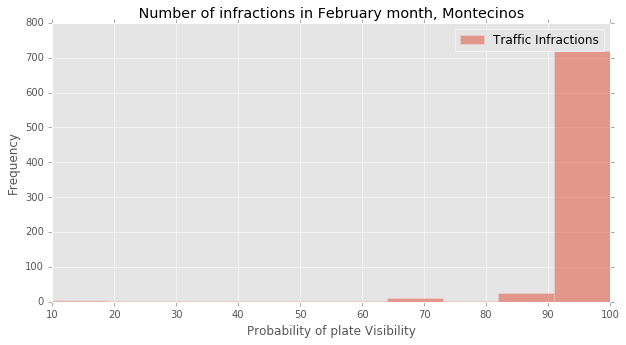

In [96]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
df_f.plot.hist(alpha=0.5, figsize=(10,5), ax = ax)
ax.set_title(' Number of infractions in February month, Montecinos ')
ax.legend(["Traffic Infractions"])
ax.set_xlabel('Probability of plate Visibility')
#plt.savefig('histogram.png', format='png', dpi=500)

# Word comments analysis

Get single words status with describe method

In [12]:
df['prob'].groupby(df['estado']).describe()

,count,mean,std,min,25%,50%,75%,max
estado,,,,,,,,
-,142.0,92.401408,22.986601,0.0,100.0,100.0,100.0,100.0
-Adelantado,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
-Altavelocidad,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
-BUG,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
-Bicicleta,4.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
-CONGESTIONDespintado,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
-Camara,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
-DESPINTADO,1.0,26.000000,NaN,26.0,26.0,26.0,26.0,26.0
-FLOTA,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [13]:
word_list = df['estado'].tolist()
clean_words = []
for word in word_list:
    clean_words.append(str(word).split('-'))

print(clean_words)

[['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion', 'PlacaNoVisible'], ['', 'Infraccion'], ['', 'Infraccion', 'PlacaNoVisible'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'PlacaNoVisible'], ['', 'Infraccion', 'GiroDerecha'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'PocoVisible'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion', 'PlacaDespintada'], ['', 'Infraccion'], ['', 'Infraccion', 'PlacaSucia'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion', 'Camion', 'Duplicado'], ['', 'Infraccion'], ['', 'Infraccion'], ['', 'Infraccion', 'Pintado'], ['', 'Infraccion

In [14]:
word_counting = []
for c_w in clean_words:
    for w in c_w:
        word_counting.append(w)
        
print(word_counting)

['', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', 'PlacaNoVisible', '', 'Infraccion', '', 'Infraccion', 'PlacaNoVisible', '', 'Infraccion', '', 'Infraccion', '', 'PlacaNoVisible', '', 'Infraccion', 'GiroDerecha', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'PocoVisible', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', 'PlacaDespintada', '', 'Infraccion', '', 'Infraccion', 'PlacaSucia', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', 'Camion', 'Duplicado', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', 'Pintado', '', 'Infraccion', '', 'Infraccion', '', 'Infraccion', 'PlacaDespintada', '', 'Infraccion', '', 'Infrac

In [18]:
clean_words = []
for simple_w in word_counting:
    if len(simple_w) == 0:
        pass
    else:
        if 'Infraccion' in simple_w:
            pass
        else:
            clean_words.append(simple_w)

In [19]:
clean_words

['PlacaNoVisible',
 'PlacaNoVisible',
 'PlacaNoVisible',
 'GiroDerecha',
 'PocoVisible',
 'PlacaDespintada',
 'PlacaSucia',
 'Camion',
 'Duplicado',
 'Pintado',
 'PlacaDespintada',
 'Camion',
 'PlacaDespintada',
 'Cortado',
 'Sticker',
 'PlacaDespintada',
 'CasiAtropella',
 'PlacaDespintada',
 'Chileno',
 'Doble',
 'Doble',
 'pocaluz',
 'blur',
 'pocaluz',
 'blur',
 'pocaluz',
 'blur',
 'pocaluz',
 'pocaluz',
 'blur',
 'casiaccidenteconelotrocarpeta',
 'muylento',
 'muylento',
 'pocaluz',
 'blur',
 'pocaluz',
 'blur',
 'muylento',
 'pocaluz',
 'blur',
 'pocaluz',
 'casichocan',
 'pocaluz',
 'blur',
 'sinplaca',
 'pocaluz',
 'blur',
 'muylento',
 'pedestrian',
 'muylento',
 'pocaluz',
 'despintado',
 'pocaluz',
 'blur',
 'pocaluz',
 'blur',
 'sinplacas',
 'sinpintar',
 'despintado',
 'muyabajo',
 'blur',
 'pocaluz',
 'blur',
 'pocaluz',
 'blur',
 'pocaluz',
 'blur',
 'pocaluz',
 'blur',
 'pocaluz',
 'blur',
 'sinpintar',
 'pedestrian',
 'pocaluz',
 'blur',
 'pocaluz',
 'blur',
 'pocaluz

In [20]:
from collections import Counter
import operator

count = Counter(clean_words)
print(count)

Counter({'RuidoAdelantado': 355, 'RuidoCaptura': 181, 'pocaluz': 169, 'blur': 167, 'PlacaDespintada': 161, 'Amanecer': 108, 'Noche': 65, 'Ruidocaptura': 60, 'Sticker': 47, 'lento': 30, 'despintado': 28, 'Duplicado': 27, 'rapido': 24, 'PlacaSucia': 20, 'night': 18, 'noche': 16, 'sinpintar': 15, 'nublado': 15, 'faltapintar': 13, 'PlacaNoVisible': 12, 'lluvia': 12, 'muylento': 10, 'RuidoCamara': 10, 'Moto': 10, 'SinPlaca': 10, 'RuidoCarril': 9, 'congestion': 7, 'SinVideo': 7, 'Pintura': 7, 'muyabajo': 7, 'bus': 6, 'sinplaca': 6, 'Camion': 6, 'sucio': 6, 'Bicicleta': 6, 'PlacaNoPintada': 5, 'Nublado': 5, 'sinPlaca': 5, 'Sincaptura': 5, 'NoVisible': 5, 'Flota': 5, 'PlacaOscura': 5, 'Colectivo': 4, 'pedestrian': 4, 'pintura': 4, 'SINPLACA': 4, 'Ruidocamara': 3, 'noice': 3, 'Doble': 3, 'pocaluzBlur': 3, 'Velocidad': 3, 'RuidoRetrasado': 3, 'moto': 3, 'trancadera': 3, 'PlacaBorrosa': 3, 'ruidoadelantado': 3, 'Chileno': 2, 'ruidoadelntado': 2, 'muyrapido': 2, 'Ambulancia': 2, 'No pintado': 2, '

In [21]:
words, count_values = zip(*count.items())
values_sorted, words_sorted = zip(*sorted(zip(count_values, words), key=operator.itemgetter(0), reverse=True))

In [22]:
values = [values_sorted, words_sorted]

hash_table = dict(zip(words_sorted, values_sorted))

print(hash_table)         


{'bicicleta': 1, 'Ruidocamara': 3, 'nicht': 1, 'bus': 6, 'RuidoAdelantado': 355, 'Roscones': 1, 'lento': 30, 'Sticker': 47, 'muchaluz': 1, 'nubladosucia': 1, 'Chileno': 2, 'dedosframesseextralaplaca': 1, 'sinPlaca': 5, 'ruidoadelntado': 2, 'muyrapido': 2, 'PlacaNoPintada': 5, 'blut': 1, 'SinSemaforo': 1, 'despintadoBUS': 1, 'placaSucia': 1, 'noche': 16, 'noice': 3, 'PlacaNoVisible': 12, 'muyRapido': 1, 'leftturns': 1, 'Ambulancia': 2, 'Sucia': 1, 'Noche': 65, 'PlacaOscur': 1, 'directo': 1, 'Ruidocaptura': 60, 'nubladoBlur': 1, 'rapido': 24, 'SinPintar': 1, 'Hamburguesas': 2, 'bicileta': 1, 'NoVisible': 5, 'RuidoCarril': 9, 'desgaste': 1, 'Nopintado': 1, 'motorapida': 1, 'Pintado': 2, 'Borroso': 1, 'bisicleta': 1, 'No pintado': 2, 'Lejos': 1, 'sinplaca': 6, 'placaenventana': 1, 'CasiAtropella': 1, 'sinpintar': 15, 'muylento': 10, 'bug': 1, 'pocaluzNublado': 1, 'sinpitar': 1, 'bugshutter': 1, 'placachilena': 1, 'Camara': 1, 'VideoLento': 1, 'DESPINTADO': 1, 'Doble': 3, 'SINPINTAR': 1, 'p

In [43]:
def plot(values_sorted, words_sorted, top_n):
    # Print a histogram containing the top N words, and print them and their counts.
    words_sorted_top = words_sorted[0:top_n]
    values_sorted_top = values_sorted[0:top_n] 
    
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    print("{0} unique words identified in the text file".format(len(values_sorted)))
    print("The top {0} words are: \n{1}".format(top_n, words_sorted_top))
    print("... their respective frequencies: \n{0}".format(values_sorted_top))
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    # Pandas DataFrame just for visualisation
    df = pd.DataFrame({'count': values_sorted_top, 'word': words_sorted_top})
    df.to_csv("word_counting_montecinos.csv", encoding='utf-8', sep=',', index=False)
    print("{0}".format(df))
    sys.stdout.flush()

    # Histogram

    # Make xticklabels comprehensible by matplotlib
    xticklabels = str(list(words_sorted_top)).split()
    # Remove the single quotes, commas and enclosing square brackets
    xtlabs = [xstr.replace("'","").replace(",","").replace("]","").replace("[","") for xstr in xticklabels]
    indices = np.arange(len(words_sorted_top))
    width = 1

    pwidth = 24
    pheight = 12
    plt.figure(figsize=(pwidth, pheight))

    plt.title('Word Frecuency Hist, top  for article',fontsize=16)
    plt.xlabel('word', fontsize=12)
    plt.ylabel('count', fontsize=12)
    print('INDICES', indices)
    print('vales_sorted', values_sorted_top)

    plt.bar(indices, values_sorted_top, width)
    plt.xticks(indices + width * 0.5, xtlabs, rotation='vertical', fontsize=8)

    plt.savefig("word_frecuency_debug_from_article.png") 
    plt.show()


def plot_case(top_n = 100):
    plot(values_sorted, words_sorted, top_n)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
169 unique words identified in the text file
The top 100 words are: 
('RuidoAdelantado', 'RuidoCaptura', 'pocaluz', 'blur', 'PlacaDespintada', 'Amanecer', 'Noche', 'Ruidocaptura', 'Sticker', 'lento', 'despintado', 'Duplicado', 'rapido', 'PlacaSucia', 'night', 'noche', 'sinpintar', 'nublado', 'faltapintar', 'PlacaNoVisible', 'lluvia', 'muylento', 'RuidoCamara', 'Moto', 'SinPlaca', 'RuidoCarril', 'congestion', 'SinVideo', 'Pintura', 'muyabajo', 'bus', 'sinplaca', 'Camion', 'sucio', 'Bicicleta', 'PlacaNoPintada', 'Nublado', 'sinPlaca', 'Sincaptura', 'NoVisible', 'Flota', 'PlacaOscura', 'Colectivo', 'pedestrian', 'pintura', 'SINPLACA', 'Ruidocamara', 'noice', 'Doble', 'pocaluzBlur', 'Velocidad', 'RuidoRetrasado', 'moto', 'trancadera', 'PlacaBorrosa', 'ruidoadelantado', 'Chileno', 'ruidoadelntado', 'muyrapido', 'Ambulancia', 'No pintado', 'Ruidoadelantado', 'otroframe', 'RuidoSentido', 'Cortado', 'FLOTA', 'Hamburguesas', 'Ade

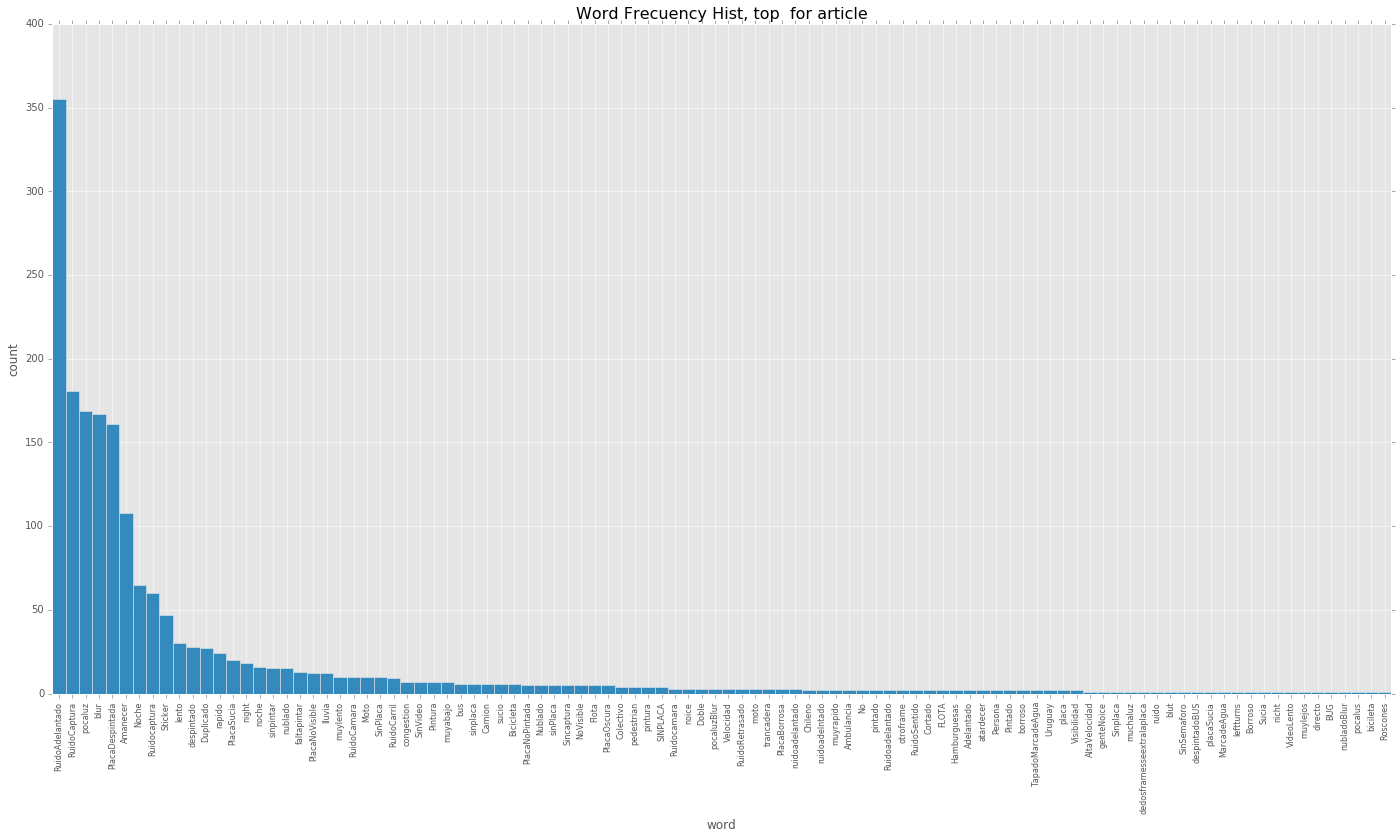

In [44]:
import sys
import numpy as np
plot_case()

# Plate number analysis

In [105]:
print(df.shape)
df.head()

(2092, 9)


,index,hora,semaforo,direccion,cuantos,estado,placa,prob,date
date,,,,,,,,,
2018-02-07 14:23:23,2018-02-07,14-23-23,ROJO,directo,x1,-Infraccion,4481CKL,100,2018-02-07 14-23-23
2018-02-07 11:11:15,2018-02-07,11-11-15,ROJO,directo,x1,-Infraccion,2198PYT,100,2018-02-07 11-11-15
2018-02-07 11:38:41,2018-02-07,11-38-41,ROJO,directo,x1,-Infraccion,2915GHF,100,2018-02-07 11-38-41
2018-02-07 09:38:48,2018-02-07,09-38-48,ROJO,directo,x1,-Infraccion-PlacaNoVisible,638USR,100,2018-02-07 09-38-48
2018-02-07 15:20:38,2018-02-07,15-20-38,ROJO,directo,x1,-Infraccion,2856IRI,100,2018-02-07 15-20-38


In [35]:
unique_plates = np.unique(df['placa'].tolist())


In [45]:
df.shape

(2092, 9)

In [36]:
count = Counter(df['placa'].tolist())
print(len(count))
print(count)

837
Counter({'x': 818, 'xxxxx': 196, 'xxxx': 64, '4129FFR': 9, nan: 7, '4521XXX': 6, 'xxxxxx': 6, '4539FFT': 4, '4465GAU': 4, '1268KHS': 4, '2743HKA': 4, '226XSN': 4, '4082UHR': 4, '3114BKS': 4, '4450PEK': 4, '3776REC': 3, '2081NHY': 3, '1240EYG': 3, '1226XCS': 3, '4213EHI': 3, '1753GYT': 3, '4489ZIE': 3, '2118KKN': 3, '4442PDN': 3, '2595YNR': 3, '2018TCP': 3, '2743RPT': 3, '4093PLT': 3, '4110GUR': 3, '2199KDT': 3, '2199CNR': 3, '4554GPB': 3, '4110HGD': 3, '4086NZT': 3, '3626LKF': 2, '1140Xxx': 2, '3823UNB': 2, '2172CFE': 2, '4061BRL': 2, '4450RHA': 2, '2447GXE': 2, '3100PBC': 2, '3773UCU': 2, '4554GTL': 2, '2299SFL': 2, '2499DGI': 2, '2151DCK': 2, '4529FZL': 2, '4689BGF': 2, '1269AGK': 2, '2246XFE': 2, '836XLH': 2, '1771PXD': 2, '3807CXT': 2, '3126HUH': 2, '4253NAN': 2, '3114IRS': 2, '4146XCR': 2, '4421SUI': 2, '1719TFI': 2, '3480SUU': 2, '4252RKS': 2, '4156GRG': 2, '2151HAH': 2, '2893BIB': 2, '4075IPR': 2, '3130FIF': 2, '1991FLY': 2, '2867USU': 2, '2373GSL': 2, '3460BAR': 2, '1324YID

In [ ]:
# Reincidentes ANalysis

In [37]:
ones = []
twos = []
trees= []
fours = []
abovefour = []
withx = []
for k, v in count.items():
    if v == 1:
        if 'x' in k:
            withx.append(k)
        else:
            ones.append(k)
    elif v == 2:
        if 'x' in k:
            withx.append(k)
        else:
            twos.append(k)
    elif v == 3:
        if 'x' in k:
            withx.append(k)
        else:
            trees.append(k)
    elif v == 4:
        if 'x' in k:
            withx.append(k)
        else:
            fours.append(k)
    else :
        if 'x' in str(k):
            withx.append(k)
        else:
            abovefour.append(k)

In [39]:
print('ONES:', len(ones))
print('TWOS:', len(twos))
print('Three:', len(trees))
print('four:', len(fours))
print('avobe four:', len(abovefour))
#print('withX:', len(withx))
print('TOTAL COBRABLES:',np.sum([len(ones), len(twos), len(trees), len(fours), len(abovefour)]))

ONES: 620
TWOS: 92
Three: 19
four: 8
avobe four: 3
TOTAL COBRABLES: 742


In [42]:
totales_uniques = np.sum([620,92/2, 19/3, 8/4, 3/5])
print(totales_uniques)
ratio = totales_uniques/742
print(ratio)

674.9333333333334
0.9096136567834682
